In [129]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [130]:
df = pd.read_csv('df_trans.csv')

In [131]:
df = df.drop(df.columns[0], axis=1)

In [132]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2024-02-01 00:04:45   2024-02-01 00:19:58              1.0   
1         2  2024-02-01 00:56:31   2024-02-01 01:10:53              1.0   
2         2  2024-02-01 00:07:50   2024-02-01 00:43:12              2.0   
3         1  2024-02-01 00:01:49   2024-02-01 00:10:47              1.0   
4         1  2024-02-01 00:37:35   2024-02-01 00:51:15              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           4.39         1.0            68           236             1   
1           7.71         1.0            48           243             1   
2          28.69         2.0           132           261             2   
3           1.10         1.0           161           163             1   
4           2.60         1.0           246            79             2   

   fare_amount  ...  minmax_fare_amount  minmax_total_amount  \
0         20.5  ...            0.094477             0.095143   
1         31.0  ...            0.095450             0.096831   
2         70.0  ...            0.099064             0.100323   
3          9.3  ...            0.093439             0.094250   
4         15.6  ...            0.094023             0.094570   

   minmax_tip_amount  minmax_tolls_amount  minmax_congestion_surcharge  \
0           0.231756             0.340882                          1.0   
1           0.237694             0.340882                          1.0   
2           0.230771             0.368945                          1.0   
3           0.232963             0.340882                          1.0   
4           0.230771             0.340882                          1.0   

   minmax_trip_duration  minmax_average_speed  minmax_fare_per_mile  \
0              0.007077              0.000009              0.500061   
1              0.006987              0.000017              0.500058   
2              0.009196              0.000026              0.500029   
3              0.006420              0.000004              0.500156   
4              0.006914              0.000006              0.500079   

   minmax_tip_percentage  store_and_fwd_flag_Y  
0               0.012215                 False  
1               0.051111                 False  
2               0.000000                 False  
3               0.042468                 False  
4               0.000000                 False  

[5 rows x 65 columns]

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9554778 entries, 0 to 9554777
Data columns (total 65 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   VendorID                           int64  
 1   tpep_pickup_datetime               object 
 2   tpep_dropoff_datetime              object 
 3   passenger_count                    float64
 4   trip_distance                      float64
 5   RatecodeID                         float64
 6   PULocationID                       int64  
 7   DOLocationID                       int64  
 8   payment_type                       int64  
 9   fare_amount                        float64
 10  extra                              float64
 11  mta_tax                            float64
 12  tip_amount                         float64
 13  tolls_amount                       float64
 14  improvement_surcharge              float64
 15  total_amount                       float64
 16  congestion_surchar

In [134]:
# Feature selection (excluding tip_amount and any non-numeric columns for simplicity)
X = df.drop(columns=['tip_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag_Y'])
y = df['tip_amount']
# Replace NaN and infinity values
X = X.replace([np.inf, -np.inf], np.nan)  # Replace infinity values with NaN
X = X.fillna(X.mean())  
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [8]:
# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Predictions
y_pred = model.predict(X_test)

In [11]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 2.7445142323615313e-25
Mean Absolute Error (MAE): 3.932217280947112e-13
R-squared (R2): 1.0


In [12]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Tip Amount")
plt.ylabel("Predicted Tip Amount")
plt.title("Actual vs Predicted Tip Amount")
plt.show()

In [13]:
# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()

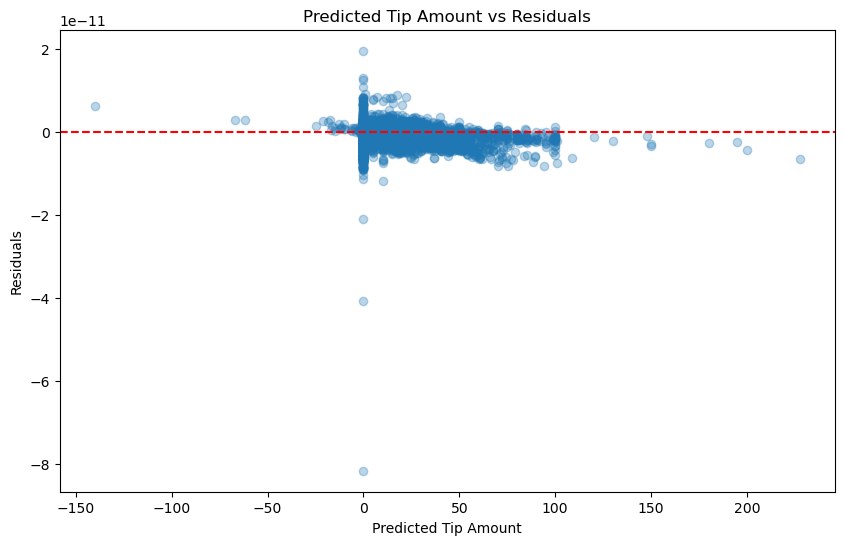

In [14]:
# Predicted vs Residuals Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Tip Amount")
plt.ylabel("Residuals")
plt.title("Predicted Tip Amount vs Residuals")
plt.show()

# LightGBM

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor

In [16]:
# LightGBM model
model = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.340031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9015
[LightGBM] [Info] Number of data points in the train set: 7643822, number of used features: 61
[LightGBM] [Info] Start training from score 3.271211
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMRegressor(max_depth=6, random_state=42)

In [17]:
# Predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse_lgbm = mean_squared_error(y_test, y_pred)
mae_lgbm = mean_absolute_error(y_test, y_pred)
r2_lgbm = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_lgbm}")
print(f"Mean Absolute Error (MAE): {mae_lgbm}")
print(f"R-squared (R2): {r2_lgbm}")

Mean Squared Error (MSE): 0.055731800147550206
Mean Absolute Error (MAE): 0.01388043663149572
R-squared (R2): 0.9963180909830156


In [18]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Tip Amount")
plt.ylabel("Predicted Tip Amount")
plt.title("Actual vs Predicted Tip Amount")
plt.show()

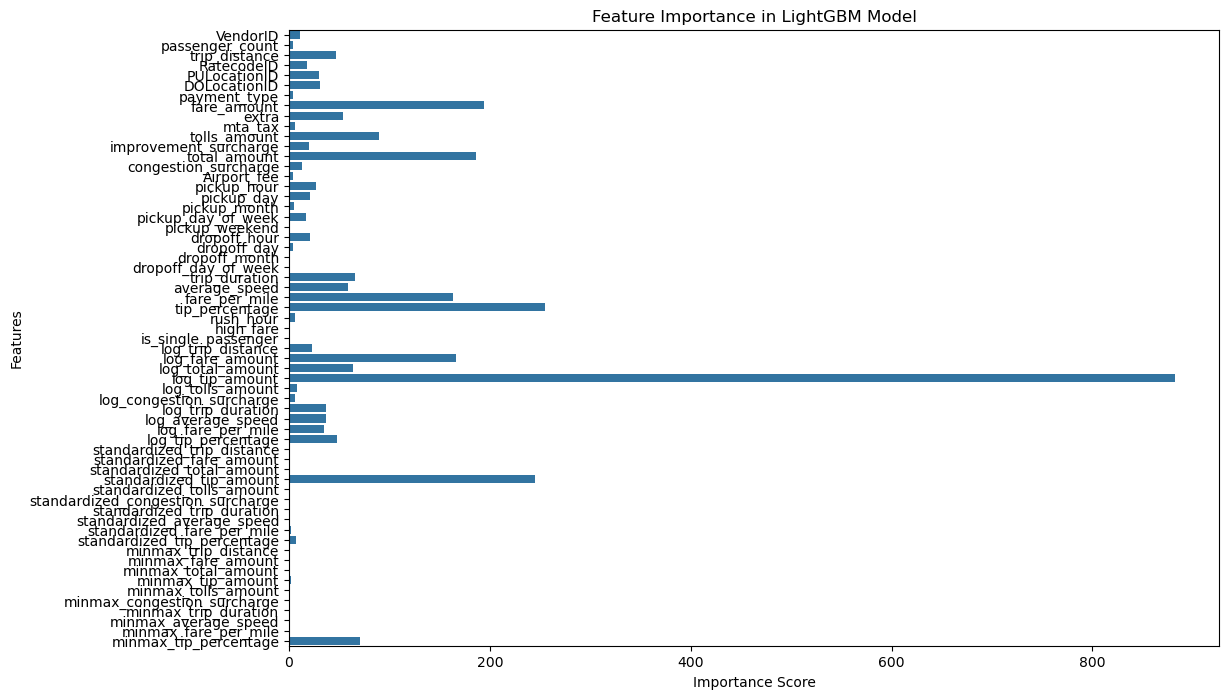

In [19]:
# Feature importance plot
plt.figure(figsize=(12, 8))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance in LightGBM Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Neural Network (MLPRegressor)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [21]:
model = MLPRegressor(hidden_layer_sizes=(100, 50, 25), max_iter=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [22]:
# Calculate evaluation metrics
mse_mlp = mean_squared_error(y_test, y_pred)
mae_mlp = mean_absolute_error(y_test, y_pred)
r2_mlp = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_mlp}")
print(f"Mean Absolute Error (MAE): {mae_mlp}")
print(f"R-squared (R2): {r2_mlp}")

Mean Squared Error (MSE): 0.00016737385207877251
Mean Absolute Error (MAE): 0.001854560136350041
R-squared (R2): 0.9999889424835813


In [23]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Tip Amount")
plt.ylabel("Predicted Tip Amount")
plt.title("Actual vs Predicted Tip Amount")
plt.show()

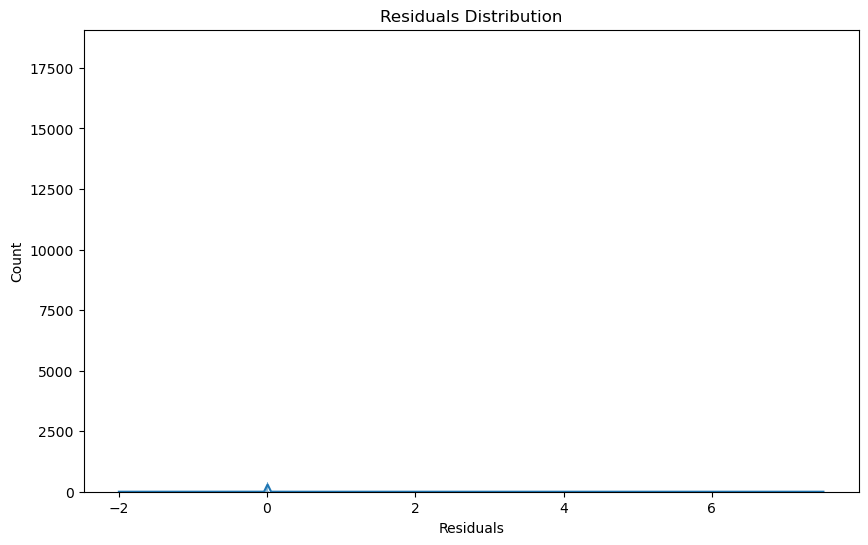

In [24]:
# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()

In [25]:
# Predicted vs Residuals Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Tip Amount")
plt.ylabel("Residuals")
plt.title("Predicted Tip Amount vs Residuals")
plt.show()

# Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Define Random Forest model
model = RandomForestRegressor(n_estimators=25, max_depth=10, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [31]:
# Evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print(f"Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R2: {r2_rf}")

Random Forest - MSE: 0.0018473858903980478, MAE: 0.0012217278709497252, R2: 0.9998779528608497


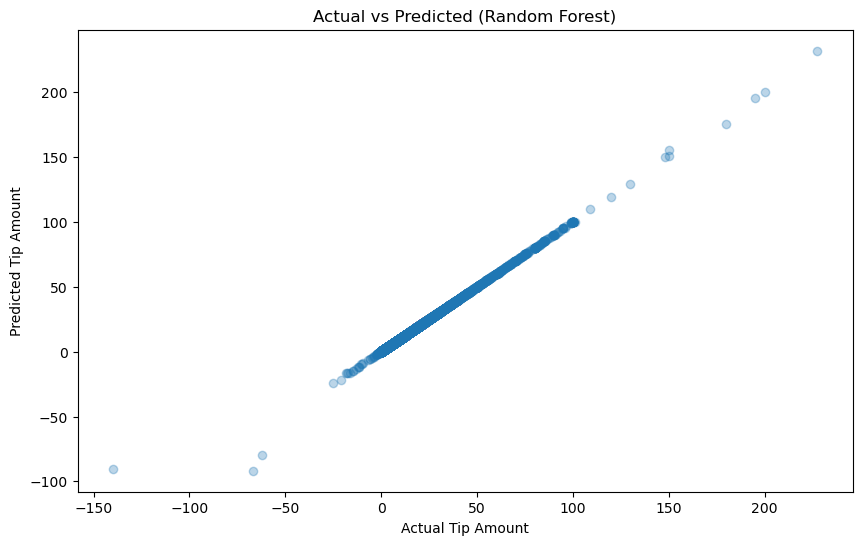

In [32]:
# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Tip Amount")
plt.ylabel("Predicted Tip Amount")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()

# CatBoost Regressor

In [33]:
from catboost import CatBoostRegressor

In [34]:
# Define CatBoost model
model = CatBoostRegressor(n_estimators=100, learning_rate=0.1, depth=6, random_seed=42, verbose=False)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [35]:
# Evaluation metrics
mse_cb = mean_squared_error(y_test, y_pred)
mae_cb = mean_absolute_error(y_test, y_pred)
r2_cb = r2_score(y_test, y_pred)

print(f"CatBoost - MSE: {mse_cb}, MAE: {mae_cb}, R2: {r2_cb}")

CatBoost - MSE: 0.07639684881647607, MAE: 0.04454052196626201, R2: 0.9949528591256362


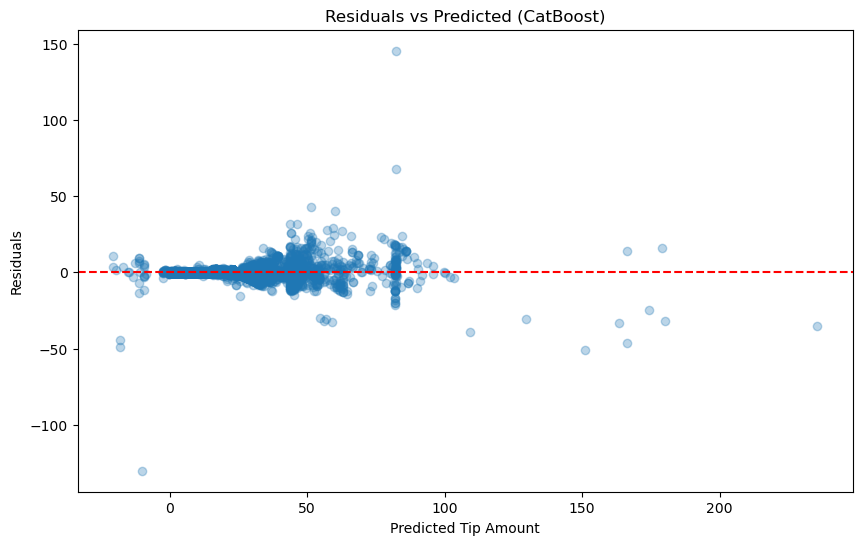

In [36]:
# Residuals vs Predicted plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Tip Amount")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (CatBoost)")
plt.show()

In [37]:
MSE = [mse,mse_lgbm,mse_mlp,mse_rf,mse_cb]
MAE = [mae,mae_lgbm,mae_mlp,mae_rf,mae_cb]
R = [r2,r2_lgbm,r2_mlp,r2_rf,r2_cb]

In [50]:
# Creating a DataFrame
df = pd.DataFrame({
    'Model': ['Linear Regression', 'LightGBM', 'MLP', 'RandomForest', 'CatBoost'],
    'MSE': MSE,
    'MAE': MAE,
    'R^2': R
})

In [51]:
file_path = 'model_metrics.csv'

In [52]:
df.to_csv(file_path, index=False)

In [53]:
file_path

'model_metrics.csv'

In [63]:
df2 = df

In [68]:
df2

Model       MSE       MAE       R^2
0  Linear Regression  2.744514  3.932217  0.700000
1           LightGBM  0.055732  0.013880  0.996318
2                MLP  0.000167  0.001855  0.999989
3       RandomForest  0.001847  0.001222  0.999878
4           CatBoost  0.076397  0.044541  0.994953

In [69]:
updated_file_path = 'updated_model_metrics.csv'
df.to_csv(updated_file_path, index=False)
updated_file_path

'updated_model_metrics.csv'

In [77]:
# Creating subplots for better comparison
fig, axs = plt.subplots(1, 3, figsize=(10,10))

# Bar plot for MSE
axs[0].bar(df2['Model'], df2['MSE'], alpha=0.7, color='blue')
axs[0].set_title('Mean Squared Error (MSE) by Model')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('MSE')
axs[0].tick_params(axis='x', rotation=45)

# Bar plot for MAE
axs[1].bar(df2['Model'], df2['MAE'], alpha=0.7, color='orange')
axs[1].set_title('Mean Absolute Error (MAE) by Model')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('MAE')
axs[1].tick_params(axis='x', rotation=45)

# Bar plot for R^2
axs[2].bar(df2['Model'], df2['R^2'], alpha=0.7, color='green')
axs[2].set_title('R^2 by Model')
axs[2].set_xlabel('Model')
axs[2].set_ylabel('R^2')
axs[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [85]:
# Dropping the 'Linear Regression' row from the DataFrame
df2_filtered = df2[df2['Model'] != 'Linear Regression']

# Creating subplots for filtered data
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# Bar plot for MSE
axs[0].bar(df2_filtered['Model'], df2_filtered['MSE'], alpha=0.7, color='blue')
axs[0].set_title('Mean Squared Error (MSE) by Model')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('MSE')
axs[0].tick_params(axis='x', rotation=45)

# Bar plot for MAE
axs[1].bar(df2_filtered['Model'], df2_filtered['MAE'], alpha=0.7, color='orange')
axs[1].set_title('Mean Absolute Error (MAE) by Model')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('MAE')
axs[1].tick_params(axis='x', rotation=45)

# Bar plot for R^2
axs[2].bar(df2_filtered['Model'], df2_filtered['R^2'], alpha=0.7, color='green')
axs[2].set_title('R^2 by Model')
axs[2].set_xlabel('Model')
axs[2].set_ylabel('R^2')
axs[2].set_ylim(0.992, 1)
axs[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


# Fine tuning MLP

In [92]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ParameterGrid, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
from sklearn.datasets import make_regression

In [106]:
# Define reduced parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant'],
    'max_iter': [200]
}

In [107]:
results = []

In [108]:
model = MLPRegressor(random_state=42)

In [109]:
for params in ParameterGrid(param_grid):
    print(f"Training with parameters: {params}")
    model = MLPRegressor(random_state=42, **params)
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results
    results.append({
        **params,
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    })

Training with parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Training with parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Training with parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Training with parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Training with parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Training with parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}


In [110]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

In [111]:
results_df

activation   alpha hidden_layer_sizes learning_rate  max_iter solver  \
0       relu  0.0001              (50,)      constant       200   adam   
1       relu  0.0001             (100,)      constant       200   adam   
2       relu  0.0001          (100, 50)      constant       200   adam   
3       relu  0.0010              (50,)      constant       200   adam   
4       relu  0.0010             (100,)      constant       200   adam   
5       relu  0.0010          (100, 50)      constant       200   adam   

        MSE       MAE        R2  
0  0.001630  0.003130  0.999892  
1  0.000066  0.000994  0.999996  
2  0.000682  0.001697  0.999955  
3  0.000260  0.008073  0.999983  
4  0.000159  0.003362  0.999990  
5  0.000155  0.001743  0.999990

In [117]:
# Combine columns into a single descriptive column in results_df
results_df['configuration'] = (
    results_df['activation'] + 
    ", alpha=" + results_df['alpha'].astype(str) +
    ", layers=" + results_df['hidden_layer_sizes'].apply(lambda x: str(x)) +
    ", lr=" + results_df['learning_rate'] +
    ", max_iter=" + results_df['max_iter'].astype(str) +
    ", solver=" + results_df['solver']
)

# Keep only the combined configuration column and metrics for display
results_df_combined = results_df[['configuration', 'MSE', 'MAE', 'R2']]

In [118]:
results_df_combined.head()

configuration       MSE       MAE  \
0  relu, alpha=0.0001, layers=(50,), lr=constant,...  0.001630  0.003130   
1  relu, alpha=0.0001, layers=(100,), lr=constant...  0.000066  0.000994   
2  relu, alpha=0.0001, layers=(100, 50), lr=const...  0.000682  0.001697   
3  relu, alpha=0.001, layers=(50,), lr=constant, ...  0.000260  0.008073   
4  relu, alpha=0.001, layers=(100,), lr=constant,...  0.000159  0.003362   

         R2  
0  0.999892  
1  0.999996  
2  0.999955  
3  0.999983  
4  0.999990

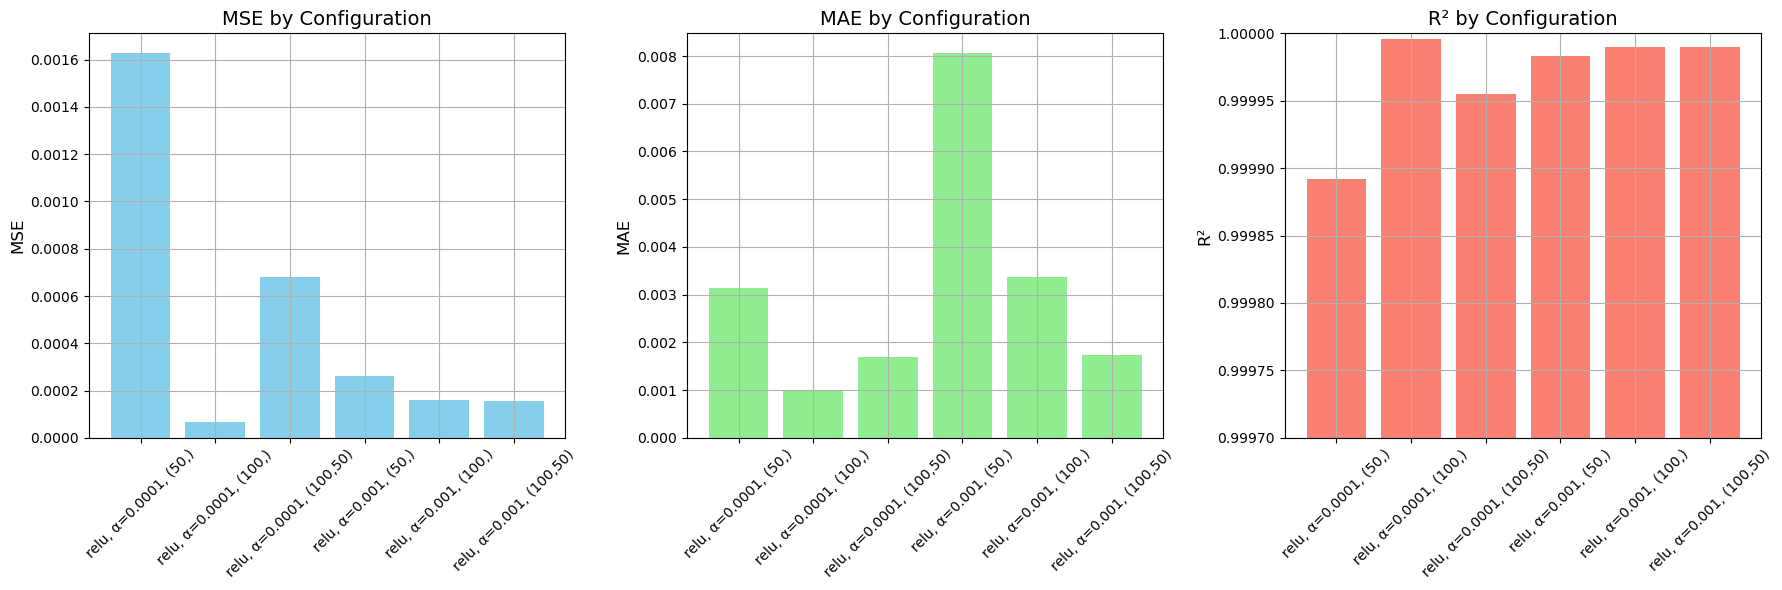

In [127]:
# Corrected short_labels to match the number of rows in results_df_combined
short_labels = [
    'relu, α=0.0001, (50,)',
    'relu, α=0.0001, (100,)',
    'relu, α=0.0001, (100,50)',
    'relu, α=0.001, (50,)',
    'relu, α=0.001, (100,)',
    'relu, α=0.001, (100,50)'
]

# Create a figure with subplots in a single row
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Bar plot for MSE
axes[0].bar(short_labels, results_df_combined['MSE'], color='skyblue')
axes[0].set_title('MSE by Configuration', fontsize=14)
axes[0].set_ylabel('MSE', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Bar plot for MAE
axes[1].bar(short_labels, results_df_combined['MAE'], color='lightgreen')
axes[1].set_title('MAE by Configuration', fontsize=14)
axes[1].set_ylabel('MAE', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Bar plot for R²
axes[2].bar(short_labels, results_df_combined['R2'], color='salmon')
axes[2].set_title('R² by Configuration', fontsize=14)
axes[2].set_ylabel('R²', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylim(0.9997, 1)
axes[2].grid(True)

# Adjust layout
plt.tight_layout()

# Show the improved plots
plt.show()
